# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
In the initial simulation, without changing parameters, the agent does not move in the given environment.

The agent recieves both negative and positive rewards.

The agent is always idle in the environment. Thus, the rewards of the agent change dependent on the traffic signal at the intersection and the incoming traffic. Logically, staying idle during the red signal is suitable, but at green signals we want our car to move to the destination.

In our simulation, the reward value confirms our logic. When our car is idle at the red signal, we get a positive reward typically in the range of 1 to 3. When the signal is green and the car is idle with no incoming traffic, our car is expected to move. As our car is always stationary, in such case it recieves a high negative reward of value above 3.

# Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
Flags in agent.py:

agent.learning = This flag shows whether our agent is testing or training. If we are training, we will update our Q-Tables, if we are not learning, we will drive through the environment without storing our experiences.

agent.epsilon = This is the exploration factor. In an environment, we cannot only make d
decisions based on the best values in our Q-Table. We also need to explore actions, which seem inappropriate, or have lesser Q-Table values. This will help our agent's response when in unknown states be better, and our learning will be more complete. The rate of exploration is stored in epsilon.

tolerance = If epsilon reaches this threshold value, we will pause our training and start testing our model. 

agent.alpha = This is our learning rate. This is the rate, at which we discard the previously learned information and accept the new information learned at each state by the model.
n_test = The number of testing states for our model.


When an agent makes an action, in environment.py we call the act() method. In this method, we pass our intended action and our agent object. The function, first checks the validity of our state, and the action. It will only let us execute an action in a state, if it exists amongst the list of predefined valid states and actions. Post that, the act checks the signal light, the surrounding dummies, and calculates the violation which will take place if the agent takes the particular action. It will then let the agent take that action in the environment, and then update the agent and environment metrics based on this action.

render() is a function which updates and writes state data on our GUI in PyGame. render_text() is a function which write state data for display on our terminal window. We can edit information, and add additional stats, or metrics we would wish to see in these functons.

In the function planner.py(), we first consider if the agent is east or west of our given destination and then check whether we are north of south of our destination. In both these  condition we first check whether our destination is South_East and we are moving West or North, and act acordingly. We then check whether out destination is North_West and we are heading East or South and act accordingly. 


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


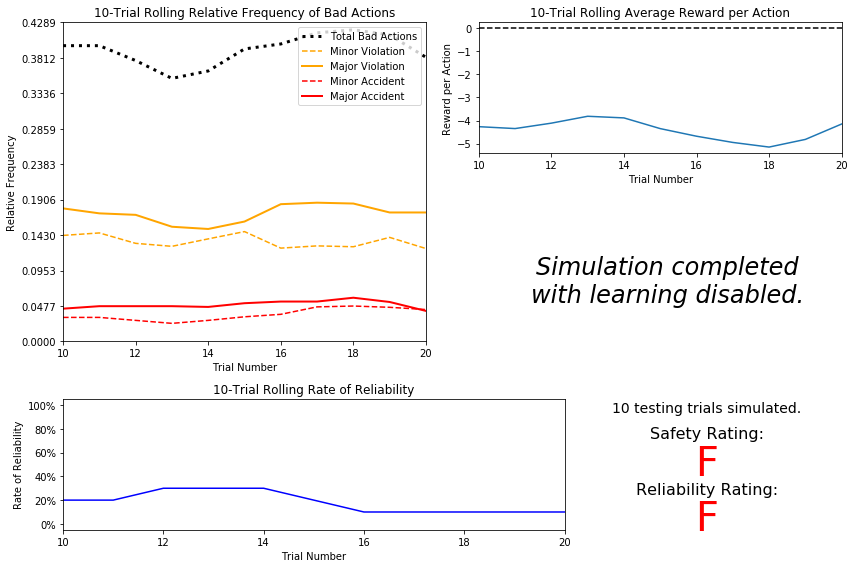

In [15]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

In [17]:
import pandas as pd 

no_learning_data = pd.read_csv('raw_data/training_data_no_learning.csv')
for i in range(1,20):
    
    #Finding out number of bad decisions, the average penalty and the number of accidents due bad decisions.
    a = no_learning_data[no_learning_data['Trial']==i][no_learning_data['reward'] < 0].count()['reward']
    inter = no_learning_data[no_learning_data['Trial']==i][no_learning_data['reward'] < 0]
    b = inter.mean()['reward']
    c= inter[inter['violation'] > 2].count()['reward']
    print '\n\n Trial {}:'.format(i)
    print 'Number of bad decisions taken are {}, number of accidents caused by them are {} and the average penalty for each bad decision is {}'.format(a,c,b)
   
    #Mean reward per decision
    d = no_learning_data[no_learning_data['Trial']==i].mean()['reward']
    e = (no_learning_data[no_learning_data['Trial']==i].count()['reward']-a)/(a*1.0)
    print 'The average reward per action is {}'.format(d)
    print 'The ratio between valid to invalid actions is {}'.format(e)
    
    

/Users/akhilsethia/miniconda3/envs/ml2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/akhilsethia/miniconda3/envs/ml2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  




 Trial 1:
Number of bad decisions taken are 13, number of accidents caused by them are 1 and the average penalty for each bad decision is -10.4704359536
The average reward per action is -3.87670050347
The ratio between valid to invalid actions is 1.30769230769


 Trial 2:
Number of bad decisions taken are 13, number of accidents caused by them are 1 and the average penalty for each bad decision is -6.24492057099
The average reward per action is -2.66975255535
The ratio between valid to invalid actions is 0.923076923077


 Trial 3:
Number of bad decisions taken are 15, number of accidents caused by them are 2 and the average penalty for each bad decision is -11.3762768233
The average reward per action is -6.47249082549
The ratio between valid to invalid actions is 0.666666666667


 Trial 4:
Number of bad decisions taken are 9, number of accidents caused by them are 1 and the average penalty for each bad decision is -9.06914477388
The average reward per action is -3.40649132257
The rat

**Answer:**
There is no observable trend of improving results with each recurring trial. The results are random, and the ratio of valid to invalid action is variable. This is consitent with the fact that the agent does not learn from its past experiences and act differently each time.

The rate of reliability is extremely low, this agrees with the fact that there is no logic while decision making for the car. 

The cab is not safe for driving, this is because there is no underlying method by which the cab makes it decisions. It is made by pure chance, and we cannot leave safety of the passengers to chance.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
I believe features most relevant for learning safety and efficiency are only few of the sensory input features that are available to the driver. 

RELEVANT STATE FEATURES:

Input-Light: This feature is relevant to the cab, as the cab will decide to move or remain stationary in its current state dependent on the traffic light. To ensure maximum efficieny it is crucial for the cab to move towards its destination as soon as possible. This is only possible, if the can does not halt until it is absolutely necessary. The green light defines all possible instances, in which the smartcab can move towards its goal. Responsiveness to the green light is importat for efficiency. Similarly, the red light signifies times when other vehicales are moving across intersections and it is unsafe for the car to move as it might undergo an accident. Hence, halting at red light is important. Thus this input is needed in the state information.

Input-Left: When the red light signal is indicated, all neighbouring cars will stop, so having information about the direction of the car on the left is redundant. When the signal is green, the car on the left can navigate 'None, Left, Right, Forward'. If this car moves 'Forward' and our cab decided to move 'Left', there can be a possibble accident. When the car on the left, steers to the 'Right' and we decide to move in the 'Forward' direction, there may be another accident. TO avoid this, we must have information about the car on our Left. This will ensure maximum safety for our smartcab.

Input-Oncoming: This is an essential parameter in determining when the car is bound to move left. Oncoming traffic, cannot be forward or righ when we want to move left, as this will cause an majot violation, as seen in environment.py code. Hence, we would include this in our state.

WayPoint: This is an important feature as it will keep informing the cab, the best possible action to take in the given deadline for reaching the deadline. This is also reflected in the Q-Table, but values in the Q-Table incorporate both security of the driver and the speed of fulfilling the task. When the driver is very close to the deadline, he may want to take steps which may compromise a bit of safety but maximise its reachine time. Hence, this is an important state feature to consider.

IRRELEVANT STATE FEATURES:

Deadline: The infotmation, about the deadline, would be considered, while calculating, the Q-values in the table. By choosing an action with maximum Q-value, we will choose an action which is most likely to get us to our destination as soon as possible. Hence, this data is incorporated in the Q-table and we need not have this as a state feature.

Input-Right: This feature is not relevant to us. When we have a green signal, the right car will always have a red light, and will not move forward. When we wish to move right, when we have a red light, we would enter a different lane, than the reported car. Hence, this feature is not relevant to us.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
The size of the state space is 96. We have 3 features in our state, of which the light can take a binary value. The attribute waypoint can take 3 values and the attribute input features 'Oncoming' and 'Left' will take 4 values each. By computing all combinations we find out the total possible states, we get the total number of states to be 96. This state space is small and the driver can learn a policy for each intersection. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

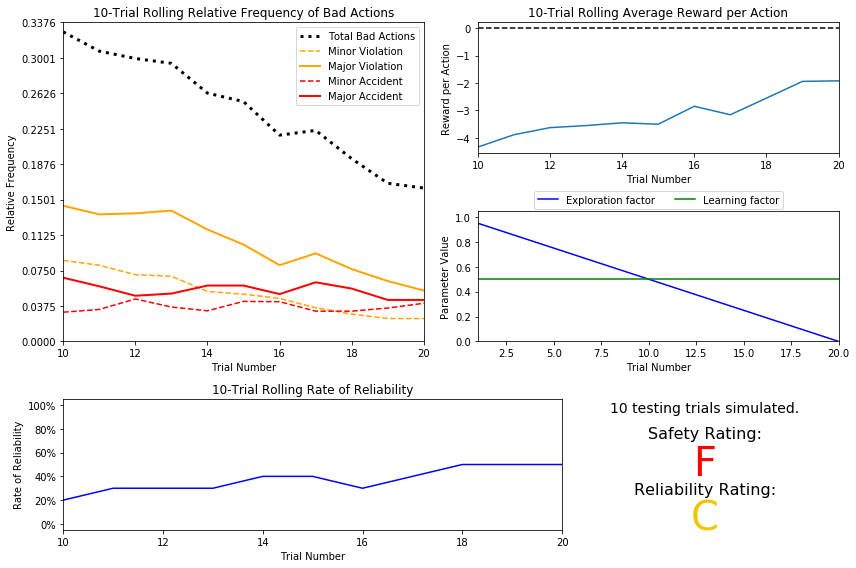

In [18]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

In [19]:
q_learning_data = pd.read_csv('raw_data/training_data_default_learning.csv')
for i in range(1,20):
    
    #Finding out number of bad decisions, the average penalty and the number of accidents due bad decisions.
    q_a = q_learning_data[q_learning_data['Trial']==i][q_learning_data['reward'] < 0].count()['reward']
    interim = q_learning_data[q_learning_data['Trial']==i][q_learning_data['reward'] < 0]
    q_b = interim.mean()['reward']
    q_c= interim[interim['violation'] > 2].count()['reward']
    print '\n\n Trial {}:'.format(i)
    print 'Number of bad decisions taken are {}, number of accidents caused by bad decsisons are {} and the average penalty for each bad decision is {} lesser than agent which has no learning'.format(-q_a+a,-q_c+c,-q_b+b)
   
    #Mean reward per decision
    q_d = no_learning_data[no_learning_data['Trial']==i].mean()['reward']
    q_e = (no_learning_data[no_learning_data['Trial']==i].count()['reward']-q_a)/(q_a*1.0)
    print 'The average reward per action is {} greater than that with no learning'.format(q_d-d)
    print 'The ratio between valid to invalid actions is {} greater than that with no learning '.format(q_e-e)
    
    

/Users/akhilsethia/miniconda3/envs/ml2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/akhilsethia/miniconda3/envs/ml2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  




 Trial 1:
Number of bad decisions taken are -2, number of accidents caused by bad decsisons are -1 and the average penalty for each bad decision is 4.53259566883 lesser than agent which has no learning
The average reward per action is -1.97912505841 greater than that with no learning
The ratio between valid to invalid actions is -0.0505050505051 greater than that with no learning 


 Trial 2:
Number of bad decisions taken are 3, number of accidents caused by bad decsisons are -1 and the average penalty for each bad decision is 8.08008129967 lesser than agent which has no learning
The average reward per action is -0.772177110292 greater than that with no learning
The ratio between valid to invalid actions is 1.38888888889 greater than that with no learning 


 Trial 3:
Number of bad decisions taken are -3, number of accidents caused by bad decsisons are -3 and the average penalty for each bad decision is 7.25336081605 lesser than agent which has no learning
The average reward per acti

/Users/akhilsethia/miniconda3/envs/ml2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in divide
  


**Answer:**
The performance parameters and metrics have been outlined above, and statistical comparision between no learning and Q learning has been made. Almost all trials show better performance with Q-Learning. The ratio between valid to invalid actions greatly increases as we go forward in the trial, thus when compared with the no learning model, the ratio is high. Observably, results get better as in the later trials. 

The agent required 20 trials before testing. This makes sense, because it will take 20 steps, before the epsilon value drops below our tolerance value.

The decaying function is represented correctly in the parameters panel.

Compared to the intitial driving agent, the reliability rating has spiked. The safety rating has not impoved, but the safety parameters have converged with each trial, showing that the trial is learning and getting better. The major violation curve, and the total bad actions cruve, are steeply reducing. This shows that our Q-learning agent has seen a big improvement, but yet cannot be trusted with handling passengers. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

Model 1: 
Epsilon-decay = e^(-0.1*trial_number)

alpha = 0.8

tolerance = 0.00001

Number of training trials = 150

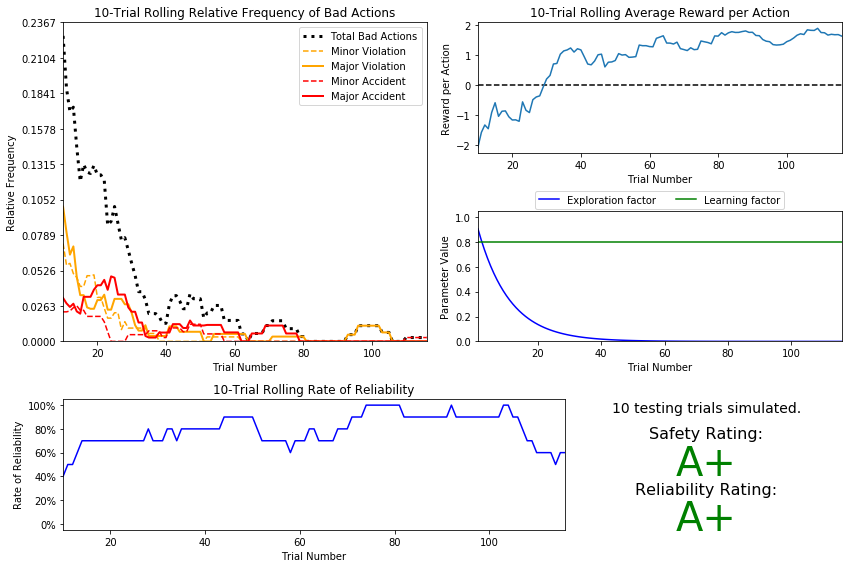

In [21]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

Model 2: 
Epsilon-decay = 0.3^(trial_number)

alpha = 0.7

tolerance = 0.00001

Number of training trials = 20

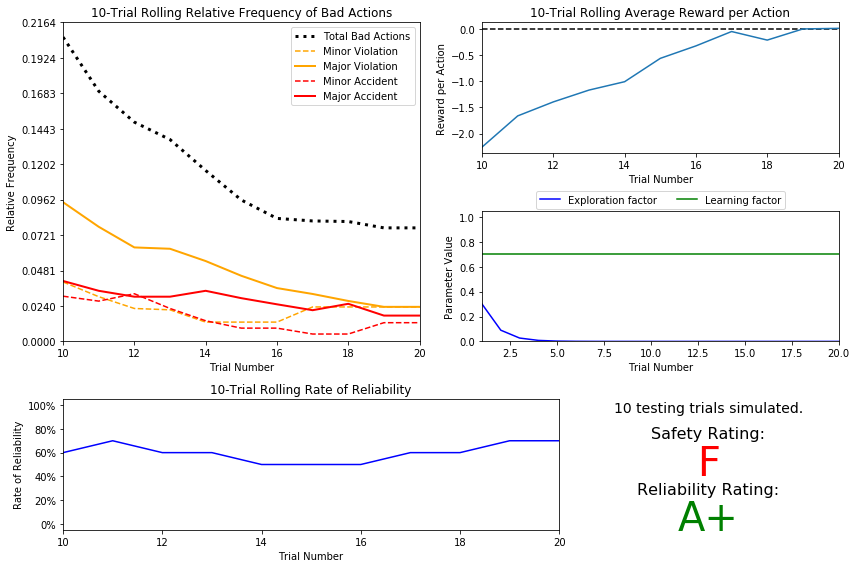

In [23]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

Model 4: 
Epsilon-decay = 1 / (trial_number^2 - 0.5125*trial_number)

alpha = 0.7

tolerance = 0.0002

Number of training trials = 70

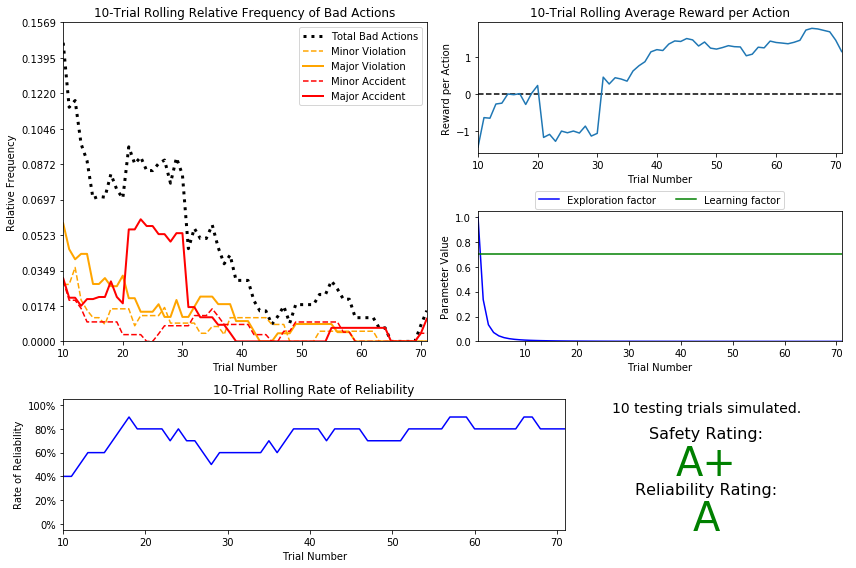

In [50]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

Model 5: 
Epsilon-decay = 1 / (trial_number^2 + 0.5*trial_number)

alpha = 0.5

tolerance = 0.00001

Number of training trials = 320

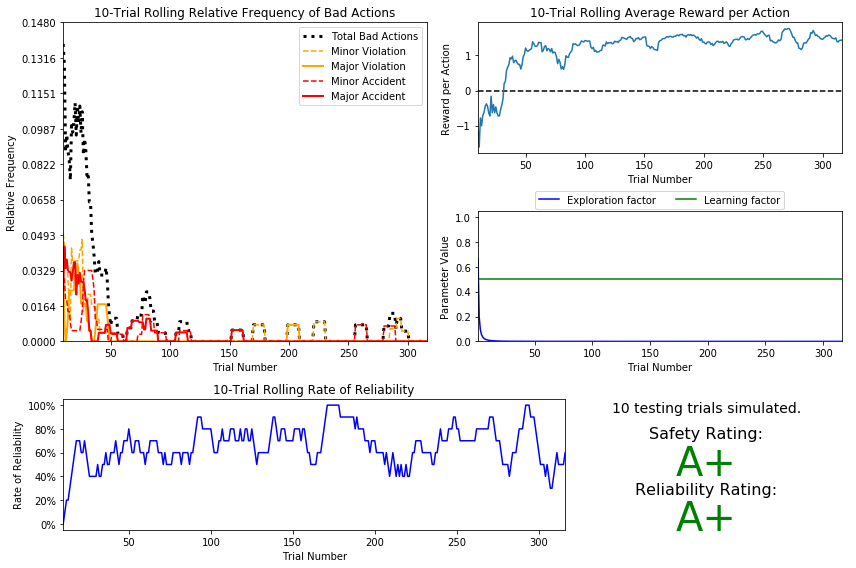

In [46]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

Model 6: 
Epsilon-decay = 0.9 ^ (trial_number*0.8)

alpha = 0.95

tolerance = 0.00015

Number of training trials = 120


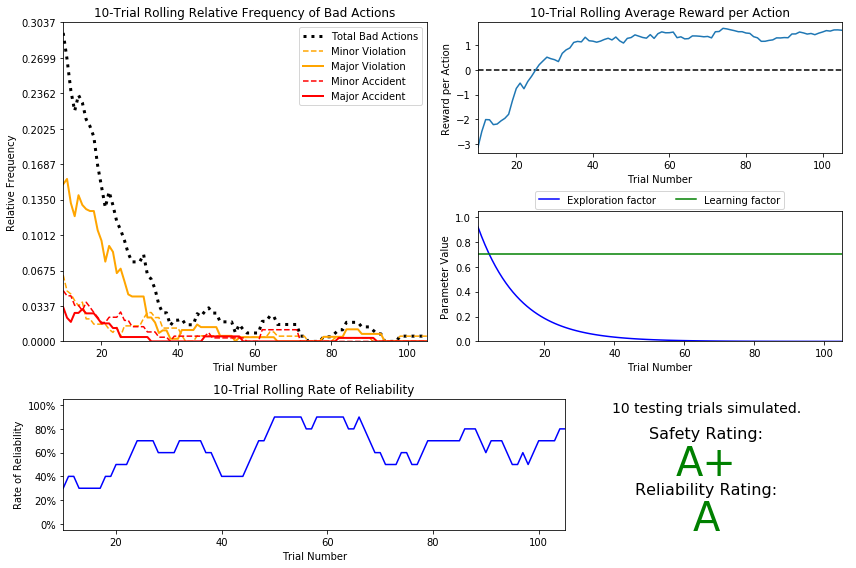

In [43]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** Amongst all proposed models, model 1 has been as the final optimised model  for the self driving car. 

For this model, I chose the tolerance to be low, and the epsilon decay function to have a high intial value, but degrade quickly. In the panel, we can observe that the exploration, is high in the initial parts, but slowly decays to close to the tolerance, and in the rest of the graph, the agent can keep leaning by implementation through its Q-Table. I have also set an unusally high alpha for this agent. The agent should initially learn more aggressively. As time passes, the agent implements its Q-Table more often rather than exploring more, so a high epsilon value, would mean that the agent is learning the most suitable action in the Q-Table. Intuitively, it would mean that the learner preserves, the actions already rewarded high in the Q-Table. Hence, a high alpha is chosen.

This model has made significant improvement in comparison with the default learning model. Previously, the default model was graded an 'F' for security and 'C' for reliability. This model achieves a double A+ rating for both parameters. I believe this agent has suffieicntly learned the best policy for driving to a destination in a given time constraints.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
According to US right-of-way traffic laws, the agent should adhere to specific rules. They are:
*All references from the sim_improved-learning.txt have the following format,[WAYPOINT,LIGHT,LEFT,RIGHT]

https://udacity-reviews-uploads.s3.amazonaws.com/_attachments/19273/1509037832/driving.png

1) Agent should not move at red light unless our waypoint is right, and the car on left does not move :

forward red forward forward
 -- forward : 0.00
 -- None : 0.96
 -- right : 0.00
 -- left : 0.00

 This has been optimally learned by our agent as shown below. Highest Q-Table value at 'None' and heavy penalty at forward show this.

2) When the light is green, and waypoint is left, and the oncoming input does not move, we should move left:

 left green None None
 -- forward : 0.37
 -- None : -4.20
 -- right : -0.05
 -- left : 1.06
 
This policy is optimally learned by our agent. As the Q-value for the left ation is the highest. Thus, following US driving laws.

3) When the light is green, and waypoint is left, and the oncoming input moves forward or right, we should not move:

left green None right
 -- forward : -0.12
 -- None : -4.80
 -- right : 0.06
 -- left : 0.00
 
 left green None forward
 -- forward : 0.29
 -- None : -3.30
 -- right : -0.34
 -- left : -19.33
 
 This policy is not well learned. When the agent has waypoint left, and the oncoming input moves right or forward, we should not move. But, this is not reflected well in the Q-Table. This policy is not learned well.
 
4) When agent in green, and waypoint is right or forward, we should right or forward : 

forward green forward left
 -- forward : 2.24
 -- None : -4.31
 -- right : 0.00
 -- left : 0.00
 
 right green left right
 -- forward : 0.00
 -- None : 0.00
 -- right : 1.21
 -- left : -16.57
 
This policy is well learned by our agent. The car has waypoint forward, and moves forward at green light, and it moves right when our waypoint is right. This reflects the state diagram referenced above.
 



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
At every trial run, there is a different destination and a source, and thus the path for each iteration is different. Routes taken in one trial, may not be the shortest and safest for a different destination. Hence, we cannot give a state a certain future reward, as a state might be helpful in reaching one destination, but may also be deterimental in reaching any other destination. Another problem with the future rewards being assigned is that, the smartcab has to adhere to specific safety instructions. Irrespective of the future reward, the violations and safety condtions should be given preference. With use of future rewards, this will be hampered, and the agent will consider other varibles while making the decision. 

Another problem is that with every step the agent makes, the environment changes, the configuration of each car will change, so an optimal decision is not dependent upon Q-Table, but on the states, but the current environment instance on that moment. Hence, I believe that future rewards are not helpful. The agent does not know about the entire grid at one point. The reward in the future is not discernable because it is not static. A good decision at one time step may be regarded as a bad step in any other time step. This is why we should not add future reward in our agent.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.